In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from matplotlib.dates import DateFormatter
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from scipy.stats import norm
from scipy import stats
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import random
from sklearn.preprocessing import StandardScaler

###  Research Question 1: 

What is the trend of Single Family House in 7 cities beween 1996/4 to 2020/1?

In [4]:
city_df = pd.read_csv('City_Zhvi_SingleFamilyResidence.csv', encoding='ISO-8859-1')

In [5]:
city_df.shape

(27544, 292)

In [6]:
city = city_df[city_df.RegionName=='Fremont']
fremont_df = city[city.State=='CA']

In [7]:
city = city_df[city_df.RegionName=='Palo Alto']
pa_df = city[city.State=='CA']

In [8]:
city = city_df[city_df.RegionName=='Hayward']
hayward_df = city[city.State=='CA']

In [9]:
city = city_df[city_df.RegionName=='Oakland']
oakland_df = city[city.State=='CA']

In [10]:
city = city_df[city_df.RegionName=='Milpitas']
milpitas_df = city[city.State=='CA']

In [11]:
city = city_df[city_df.RegionName=='Newark']
newark_df = city[city.State=='CA']

In [12]:
city = city_df[city_df.RegionName=='San Jose']
sj_df = city[city.State=='CA']

In [13]:
concat_df = pd.concat([pa_df,hayward_df, oakland_df, milpitas_df, newark_df, sj_df, fremont_df])

In [14]:
concat_df.drop('RegionID',axis=1, inplace=True)
concat_df.drop('State',axis=1, inplace=True)
concat_df.drop('Metro',axis=1, inplace=True)
concat_df.drop('CountyName',axis=1, inplace=True)
concat_df.drop('SizeRank',axis=1, inplace=True)

In [15]:
concat_df

,RegionName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01
722,Palo Alto,545234.0,543242.0,543310.0,543430.0,544343.0,545403.0,548606.0,553368.0,559505.0,...,2925172,2908189,2887336,2864381,2856759,2869016,2884628,2908641,2938282,2981917
155,Hayward,162725.0,162790.0,162581.0,162326.0,162178.0,162313.0,162672.0,163035.0,163419.0,...,667279,664375,662656,661290,661798,662914,665994,668558,675074,683217
45,Oakland,160702.0,160601.0,160377.0,160177.0,160122.0,160334.0,160758.0,161053.0,161512.0,...,774408,773839,775298,779119,783488,788392,791811,795686,803580,814079
654,Milpitas,244676.0,244223.0,244088.0,244093.0,244572.0,245084.0,246109.0,247445.0,249157.0,...,1087865,1077942,1067962,1060792,1062511,1071006,1077208,1085493,1096655,1115556
1250,Newark,192646.0,192643.0,192516.0,192353.0,192624.0,193219.0,194149.0,194896.0,195902.0,...,934491,923782,916561,906382,900020,896927,900091,902519,907745,917599
11,San Jose,225093.0,225199.0,225450.0,225665.0,226261.0,226959.0,228180.0,229740.0,231609.0,...,1074801,1065842,1056155,1047575,1046709,1051544,1056687,1062925,1073070,1089860
115,Fremont,233311.0,233618.0,233714.0,233847.0,234158.0,234941.0,236234.0,237548.0,239000.0,...,1141637,1130390,1121697,1113597,1109620,1108101,1110106,1111905,1119470,1131367


In [16]:
concat_df.columns[1:]
dates=[]
for i in concat_df.columns[1:]:
    dates.append(datetime.strptime(i, '%Y-%m').date())

In [17]:
t_df = concat_df.T

In [18]:
new_header = t_df.iloc[0] #grab the first row for the header
t_df = t_df[1:] #take the data less the header row
t_df.columns = new_header

In [19]:
t_df.columns

Index(['Palo Alto', 'Hayward', 'Oakland', 'Milpitas', 'Newark', 'San Jose',
       'Fremont'],
      dtype='object', name='RegionName')

/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


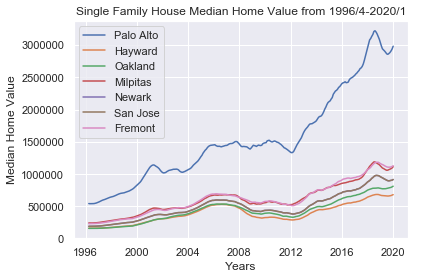

In [20]:
sns.set(style="darkgrid")
fig,axis=plt.subplots()
axis.plot(dates, t_df.iloc[:,0], label='Palo Alto')
axis.plot(dates, t_df.iloc[:,1], label='Hayward')
axis.plot(dates, t_df.iloc[:,2], label='Oakland')
axis.plot(dates, t_df.iloc[:,3], label='Milpitas')
axis.plot(dates, t_df.iloc[:,4], label='Newark')
axis.plot(dates, t_df.iloc[:,4], label='San Jose')
axis.plot(dates, t_df.iloc[:,6], label='Fremont')
axis.set_xlabel('Years')
plt.legend(loc='upper left')
axis.set_ylabel('Median Home Value')
plt.title('Single Family House Median Home Value from 1996/4-2020/1')
plt.savefig('price_cities.png')
plt.show();


### Analysis:

It shows the house price of all 7 cities from 1996 to 2020, where Palo Alto increased the most. Fremont and Milpitas house prices are close, however, there is a tendency that Milpitas recently is catching up Fremont. It depicts that the trend is going up as whole. The price of Fremont soared from around 0.25M to 0.75M between 1996 to 2006 before it started decreasing to local minimum value of roughly 0.5M in 2012. It then climbed quickly after 2012 to the local maximum value around 1.18 in 2018. 

### Research Question 2:

As a buyer, I am curious of sfh in Fremont, so let is show the value trend only in Fremont.

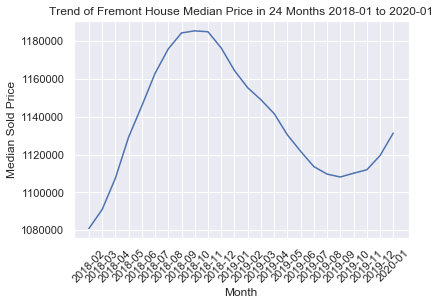

In [21]:
sns.set(style="darkgrid")
plt.plot(fremont_df.iloc[0, -24: ])
plt.title('Trend of Fremont House Median Price in 24 Months 2018-01 to 2020-01')
plt.xlabel('Month')
plt.ylabel('Median Sold Price')
plt.xticks(rotation=45)
plt.show()

In [22]:
#Difference in median value of sfh in Fremont between 2019/09 to 2019/09
fremont_df.iloc[0, -24: ].max()-fremont_df.iloc[0, -24: ].min()

104638

### Analysis:

From the graph of 7 city value trend, it depicts the median price of Fremont SFH climbed quickly after 2012 to the local maximum value around 1.18M in sep 2018 and then decreased 100,000 to 1.08M after one entire year. 

Problem: I also used Redfin dataset to analyse Fremont SFH median value trend, but in the recently 3 month, Jan 2020 has the lowest median home value, which is very different with the data in Zillow. 

### Research Question 3:

There are new houses under construction and old houses built decades ago. Explore the features of the houses based on built year to see which house have a better potential. 

In [23]:
sold_df = pd.read_excel('clean_data.xlsx', sheet_name='sold_data', index_col=[0])

In [24]:
market_df = pd.read_excel('clean_data.xlsx', sheet_name='on_market_data', index_col=[0])

In [25]:
market_df = market_df[market_df['City']=='Fremont']
sold_df = sold_df[sold_df['City']=='Fremont']

In [26]:
#First, we will need to extract zipcode from address column
market_df['zipcode']=market_df.address.apply(lambda x: x.split(' ')[-1])

In [27]:
sold_df['zipcode']=sold_df.address.apply(lambda x: x.split(' ')[-1])

In [28]:
#second, create a column in sold_data '$/sqdft' by using price/areas(living footage)
sold_df['$/sqft'] = round(sold_df.sold_price/sold_df.areas, 1)

In [29]:
#do some data exploration
sold_df.columns

Index(['bds', 'bath', 'areas', 'lot_size', 'year_built', 'central a/c',
       'central heat', 'garage', 'elem_score', 'middle_score', 'high_score',
       'elem_school', 'middle_school', 'high_school', 'sold_price', 'HOA',
       'address', 'date_sold', 'neighborhood', 'City', 'zipcode', '$/sqft'],
      dtype='object')

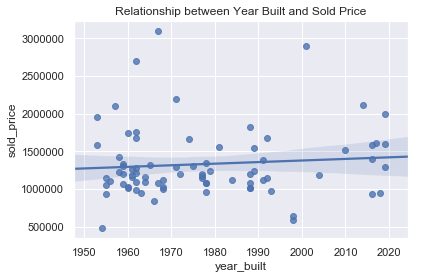

In [30]:
# Year Built VS Price: Is there any relationship bewteen when the house is built and sold price of the Houses?
sns.regplot(sold_df['year_built'], sold_df['sold_price'])
plt.title('Relationship between Year Built and Sold Price');

it shows a little positive relatationship between year_built and sold_price.

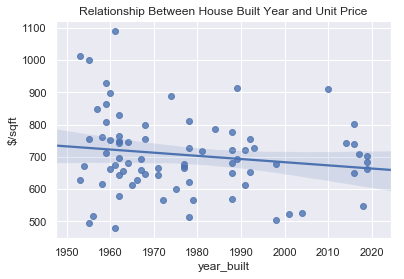

In [31]:
#show regression line between unit price and year built variables.
sns.regplot(sold_df['year_built'], sold_df['$/sqft'])
plt.title('Relationship Between House Built Year and Unit Price') 
#Unit Price here are sold price divided by living footage.
plt.show()

it shows a little negative relatationship between year_built and $/sqft.

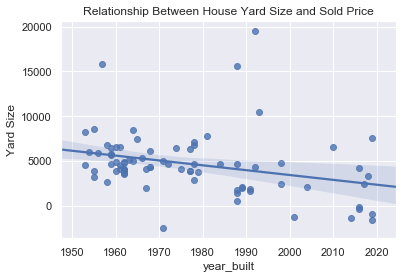

In [32]:
#calculate the yard size, and find the relationship between yard size and year built.
sns.regplot(sold_df['year_built'], (sold_df['lot_size']-sold_df['areas']))
plt.title('Relationship Between House Yard Size and Sold Price') 
plt.ylabel('Yard Size')
plt.show()

yard_size is decreasing yearly.

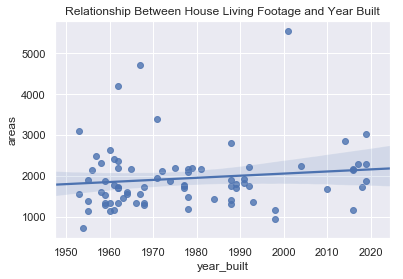

In [33]:
# Areas VS year_built
sns.regplot(sold_df['year_built'], sold_df['areas'])
plt.title('Relationship Between House Living Footage and Year Built') 
plt.show()

### Analysis:

Although the price of the house is increasing, but the unit price is decreasing year by year. The reason befind it is
that living footage sqft is increased yearly, house yard shrinked. It can be derived that in the future, if the old houses are enlarged, it will have a higher value.

## Research Question 4: 

According to badget of a buyer and purpose of the purchase, which neighborhood to choose for buying a SFH by considering title price, $/sqft, school scores?

In [34]:
sold_df['zipcode'].value_counts()

94536    29
94539    22
94538    14
94555    12
94587     1
Name: zipcode, dtype: int64

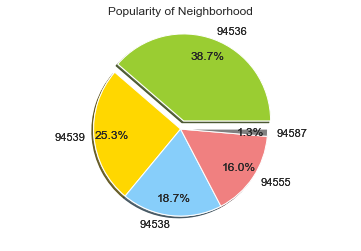

In [35]:
explode = (0.1, 0, 0, 0, 0)
lables=['94536', '94539', '94538', '94555', '94587']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'gray']
sizes = [29, 19, 14, 12, 1]
fig1, ax1 = plt.subplots() 
ax1.pie(sizes, explode=explode, labels=lables, colors=colors,autopct='%.1f%%',pctdistance = 0.8,
        shadow=True, startangle=0,frame = False)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.pie(sizes, explode=explode, labels=lables,colors=colors,autopct='%.1f%%',pctdistance = 0.8,
        shadow=True, startangle=0,frame = False)
plt.title('Popularity of Neighborhood')
plt.show();

In [36]:
#Neighborhood 
#94536: Central Fremont area
#94539: South East Fremont area
#94538: South West Fremont area
#94555: North West Fremont area
#93587: North East Fremont area
#Most popular area is Central and South west Fremont Houses. We can futher check their median value.
new_df = pd.DataFrame()
new_df['zipcode'] = sold_df['zipcode']
new_df['sold_price'] = sold_df['sold_price']
med_zipcode = new_df.groupby('zipcode').median()
med_zipcode

,sold_price
zipcode,
94536,1160000
94538,1020000
94539,1675000
94555,1145000
94587,1180000


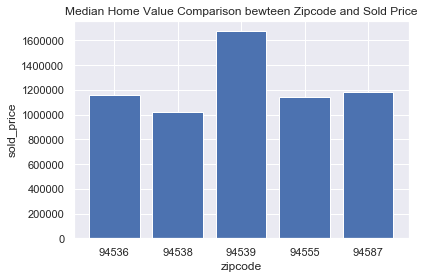

In [37]:
plt.bar(med_zipcode.index, med_zipcode.sold_price)
plt.xlabel('zipcode')
plt.ylabel('sold_price')
plt.title('Median Home Value Comparison bewteen Zipcode and Sold Price')
plt.show()

94539, south east Fremont, the second most popular area have the highest median price in the Fremont. it may be because the home living footage is larger in the area or simply the commumity and other factor makes it worth more.

In [38]:
# zipcode and area sqft 
new2_df = pd.DataFrame()
new2_df['zipcode'] = sold_df['zipcode']
new2_df['$/sqft'] = sold_df['$/sqft']
area_zipcode = new2_df.groupby('zipcode').median()

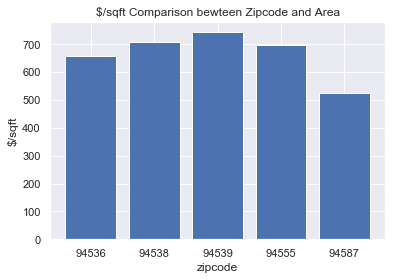

In [39]:
plt.bar(area_zipcode.index, area_zipcode['$/sqft'])
plt.xlabel('zipcode')
plt.ylabel('$/sqft')
plt.title('$/sqft Comparison bewteen Zipcode and Area')
plt.show()

It shows that 94539 has highest unit value and the most expensive total price in Fremont. Second highest is 94538, however, the total price of the house is the lowest. So we can derive from it that the house area is smaller, but if renovate and expand living area, seller can sell a good price. And for buyer, it is more affordable than other area, and the potential is better. 

In [40]:
# schools and zipcode
school_df = pd.DataFrame()
school_df['zipcode'] = sold_df['zipcode']
school_df['elem_score'] = sold_df['elem_score']
school_df['middle_score'] = sold_df['middle_score']
school_df['high_score'] = sold_df['high_score']
school_zipcode = round(school_df.groupby('zipcode').mean(), 1)
school_zipcode


,elem_score,middle_score,high_score
zipcode,,,
94536,7.2,8.0,9.1
94538,7.8,6.6,8.2
94539,7.9,8.0,9.0
94555,7.4,7.3,8.8
94587,5.0,3.0,7.0


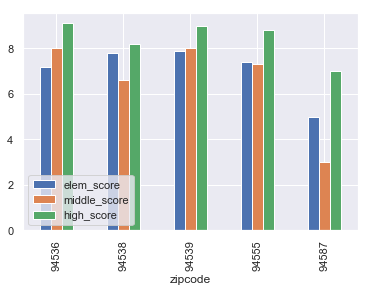

In [41]:
ax = school_zipcode.plot.bar()
ax.legend(loc='lower left')
plt.show()

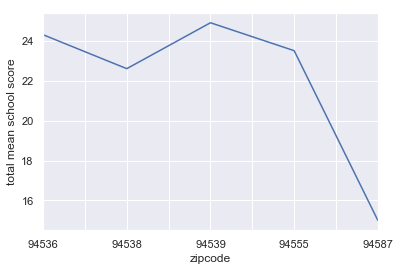

In [42]:
school_zipcode.sum(1).plot()
plt.xlabel('zipcode')
plt.ylabel('total mean school score')
plt.show()

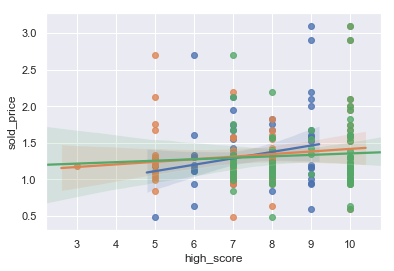

In [43]:
sns.regplot(sold_df['elem_score'], sold_df['sold_price']/1000000)
sns.regplot(sold_df['middle_score'], sold_df['sold_price']/1000000)
sns.regplot(sold_df['high_score'], sold_df['sold_price']/1000000)
plt.show()

We can come into conclusion:
1. 94539, top schools, large sqft and highest value, 2nd popular (For family has more budget)
2. 94536, top high middle school, and elementary school score is a bit lower, large sqft, most popular, 2nd least expensive $/sqft, large living area. (second choice for family with less budget, prefer good cost performance.)
3. 94538, ok schools, smaller house, 2nd expensive. (for family with less people, with limited budget and prefer investment property)
4. 94555, good schools, price are in the middle. silimar with 94536. 

### Research Question 5:

Can we predict an estimated house final selling price.

In [44]:
#mean value of single family houses price in Fremont 
mean_market = np.mean(market_df.Price)/1000000
mean_sold = np.mean(sold_df.sold_price)/1000000
(mean_market, mean_sold)
dif_mean = mean_sold - mean_market
dif_mean

-0.5224111025641027

In [45]:
#mean value of single family houses price in Fremont. median of sold and on market price are silimiar
med_market = np.median(market_df.Price)/1000000
med_sold = np.median(sold_df.sold_price)/1000000
(med_market, med_sold)
dif_med = med_sold - med_market
dif_med

-0.050000000000000044

Analysis: From the difference of 50,000 in mean home value between house on market and sold house , we can tell either the home value is increased or the pricing of house is setting higher than actual value or there are outlier in the dataset that make the distribution of the price skewed to the right.

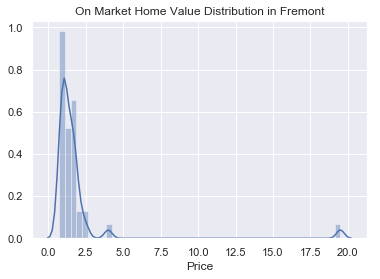

In [46]:
#plot a histgram to check if there is any outlier 
sns.distplot(market_df.Price/1000000)
plt.title('On Market Home Value Distribution in Fremont');

In [47]:
# remove outlier
market_df.drop(index = market_df.Price[market_df.Price>10000000].index, axis = 0, inplace = True)

In [48]:
market_df.drop(index = market_df.Price[market_df.Price>3000000].index, axis = 0, inplace = True)

In [49]:
sold_df.drop(index = sold_df.sold_price[sold_df.sold_price>2500000].index, axis=0, inplace=True)

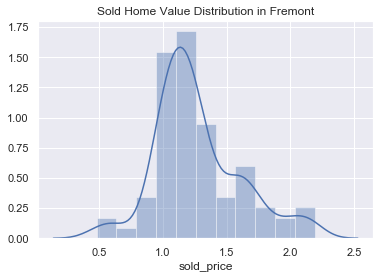

In [50]:
sns.distplot(sold_df.sold_price/1000000)
plt.title('Sold Home Value Distribution in Fremont');

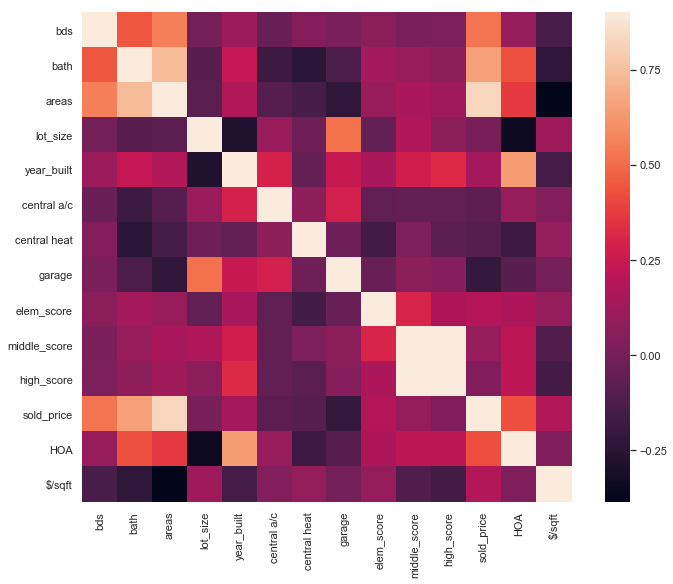

In [51]:
#check multicolinearity
corrmat = sold_df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True);

From the heat map, it shows how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. 'square feet' and 'baths', 'year built' and 'HOA/month', 'lot_size' and 'garage' indicate a situation of multicollinearity. It also shows that 'bds', 'bath', 'areas' are highly related to sold price.

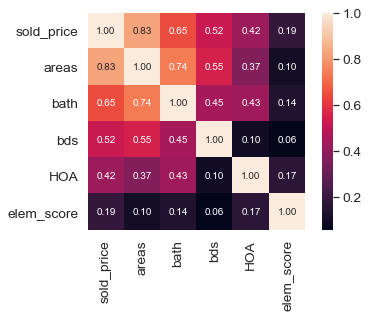

In [52]:
#What features of the house have a more important impact on selling price?
k = 6 #number of variables for heatmap
cols = corrmat.nlargest(k, 'sold_price')['sold_price'].index
cm = np.corrcoef(sold_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [53]:
sold_df.columns

Index(['bds', 'bath', 'areas', 'lot_size', 'year_built', 'central a/c',
       'central heat', 'garage', 'elem_score', 'middle_score', 'high_score',
       'elem_school', 'middle_school', 'high_school', 'sold_price', 'HOA',
       'address', 'date_sold', 'neighborhood', 'City', 'zipcode', '$/sqft'],
      dtype='object')

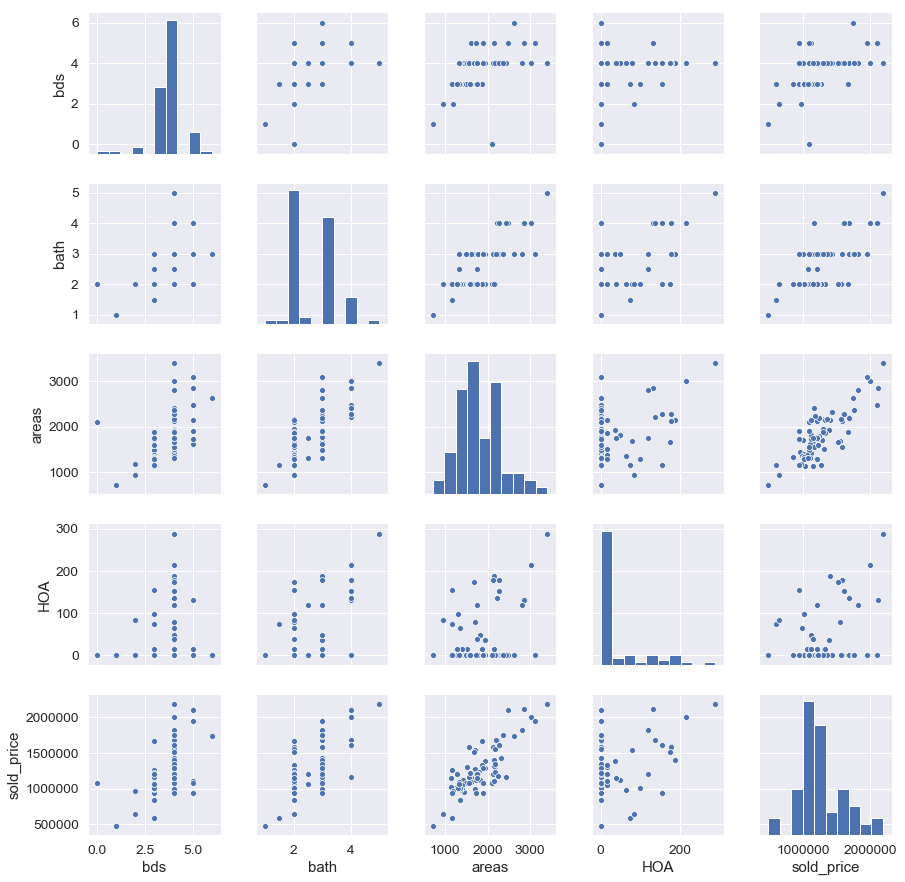

In [54]:
# plot a pair plot to check if positive or negative relationship
cols = ['bds', 'bath', 'areas', 'HOA','elem_school', 'sold_price']
sns.pairplot(sold_df[cols], height = 2.5)
plt.show();

In [55]:
Y=sold_df['sold_price']
X=sold_df[['bds', 'bath', 'areas','elem_score', 'HOA']]

In [56]:
X_train,X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [57]:
len(X_train)

52

In [58]:
len(y_train)

52

In [59]:
reg = LinearRegression()
reg.fit(X_train, y_train)
predict = reg.predict(X_test)

In [60]:
reg.coef_

array([ 7149.77377955, 53106.13902803,   506.47011685, 15917.22452984,
         352.89701801])

In [61]:
reg.intercept_

65925.04922272707

In [78]:
len(y_test.values)

23

In [77]:
len(predict)

23

In [88]:
r2_score(y_test.values, predict)

0.2694866992503747

In [89]:
reg.score(X_test, y_test)

0.2694866992503747

In [90]:
reg.score(X_train, y_train)

0.7700963545796342

### Analysis:

1. ression model doesn't fit well
2. Need to try some other models on the dataset.
3. maybe the dataset is not large enough, require more data to try again.